# 1. Read the data and perform basic analysis

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\atarb\OneDrive\Desktop\data analysis w Python\Bitcoin\Bitcoin/bitcoin_price_Training - Training.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [5]:
df.shape

(1556, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


# 2. Data Pre-processing

In [8]:
# Check whether the data types are correct

df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [9]:
# To perform a time series analysis, date needs to be in datetime format.

df['Date'] = df['Date'].astype('datetime64[ns]')

In [10]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [11]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [12]:
# That means data is collected from "April 28th 2013" to "July 31st 2017"

In [13]:
# Check if there are missing values

df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [14]:
# Check if there are duplicated values

df.duplicated().sum()

0

In [15]:
# Check the date order

df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [16]:
df.tail(2)

,Date,Open,High,Low,Close,Volume,Market Cap
1554,2013-04-29,134.44,147.49,134.0,144.54,-,"1,491,160,000"
1555,2013-04-28,135.30,135.98,132.1,134.21,-,"1,500,520,000"


In [17]:
# Change the order from oldest to newest

df = df.sort_index(ascending=False).reset_index()

In [18]:
df.head(3)

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


In [19]:
# Drop the index column

df.drop('index', axis=1, inplace=True)

In [20]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


# 3. Change analysis in price of the stock overtime

In [21]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

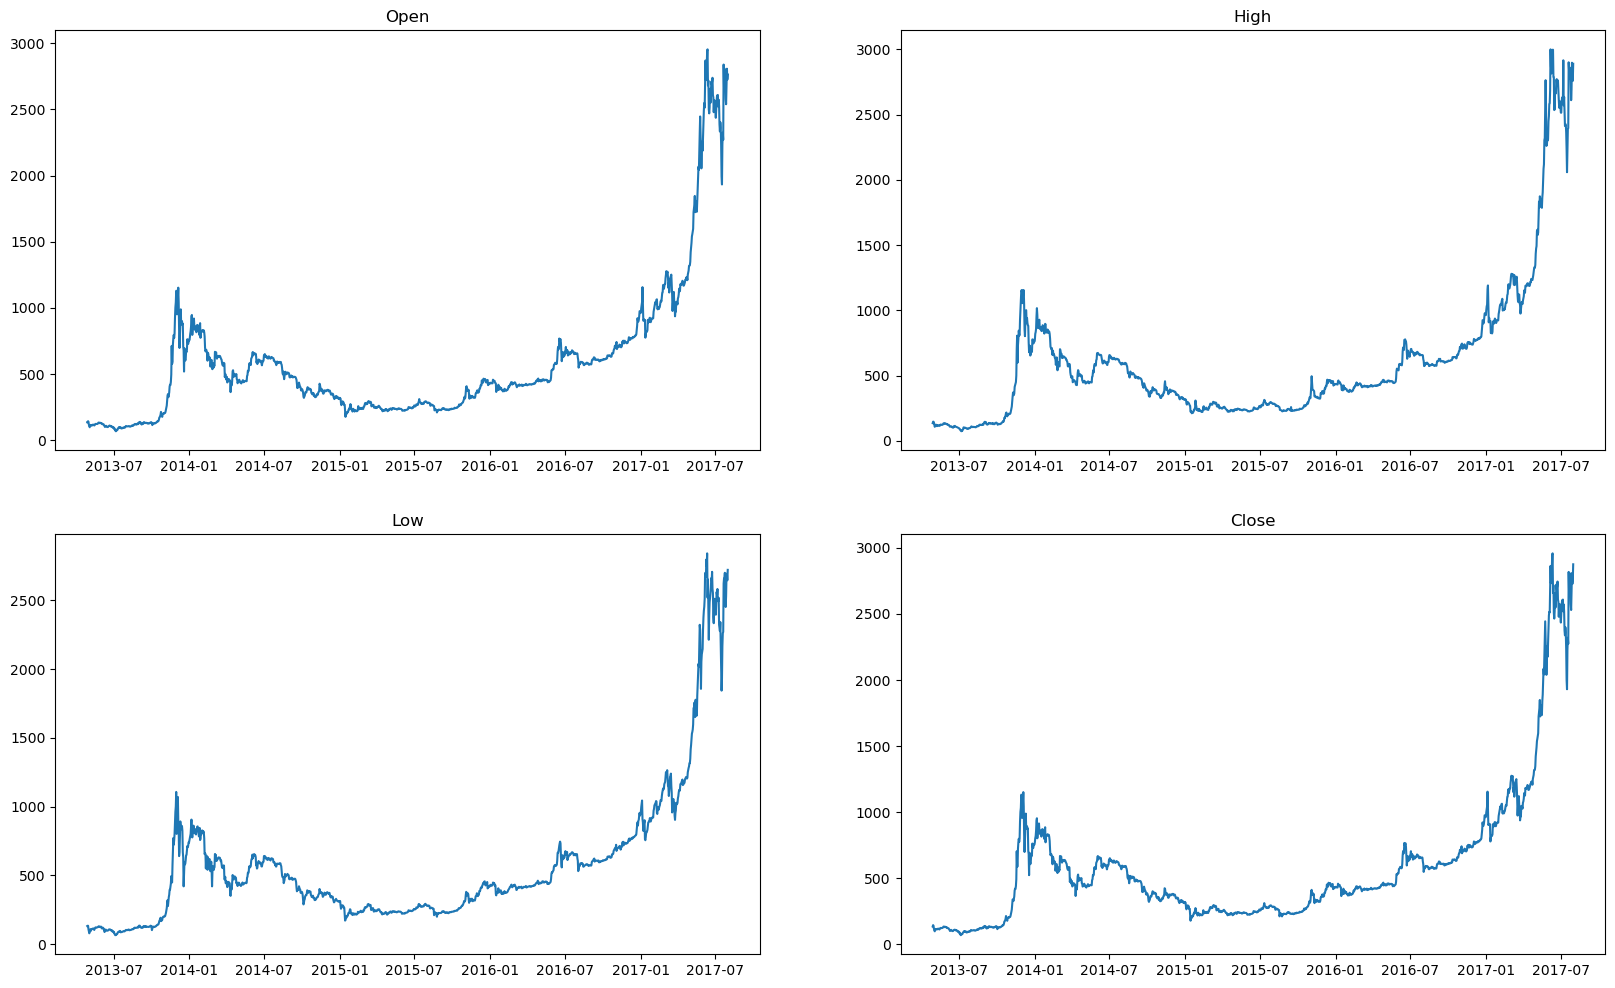

In [22]:
plt.figure(figsize=(20,12))

for index , col in enumerate(['Open', 'High', 'Low', 'Close'] , 1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'] , df[col])
    plt.title(col)

# 4. Analysing the difference among open, high, low, close values with ohlc plot

In [23]:
!pip install chart-studio
!pip install plotly

In [24]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

In [25]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [26]:
init_notebook_mode(connected=True)

In [30]:
bitcoin_sample = df[0:50] # Consider a portion of data to examine candlesticks

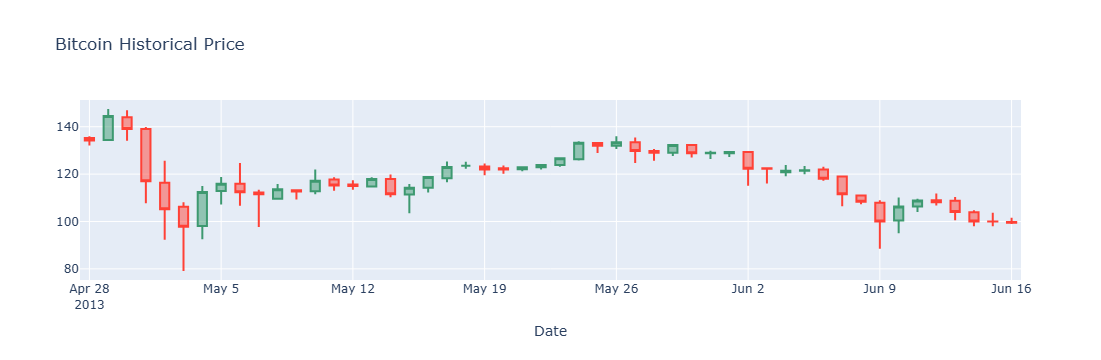

In [35]:
trace = go.Candlestick(x=df['Date'] , 
              high =bitcoin_sample['High'] , 
              open = bitcoin_sample['Open'] , 
              close =bitcoin_sample['Close'] , 
              low = bitcoin_sample['Low'])

candle_data = [trace]

layout = {
    'title':'Bitcoin Historical Price' , 
    'xaxis':{'title':'Date'}
}

fig = go.Figure(data = candle_data , layout=layout)

fig.update_layout(xaxis_rangeslider_visible = False)
iplot(fig)

In [ ]:
# Display the candlestick chart of the whole data

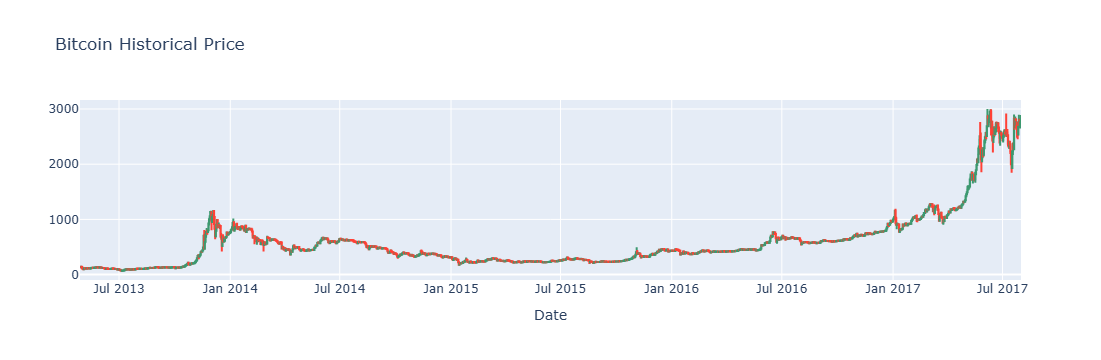

In [29]:
trace = go.Candlestick(x=df['Date'] , 
              high =df['High'] , 
              open = df['Open'] , 
              close =df['Close'] , 
              low = df['Low'])

candle_data = [trace]

layout = {
    'title':'Bitcoin Historical Price' , 
    'xaxis':{'title':'Date'}
}

fig = go.Figure(data = candle_data , layout=layout)

fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

In [36]:
# Conlusion: We observe peaks in 2014 and 2017 while there is a downward trend in 2015 and 2016.

# 5. Analysing the closing price in-depth

In [37]:
df['Close']

0        134.21
1        144.54
2        139.00
3        116.99
4        105.21
         ...   
1551    2671.78
1552    2809.01
1553    2726.45
1554    2757.18
1555    2875.34
Name: Close, Length: 1556, dtype: float64

<Axes: >

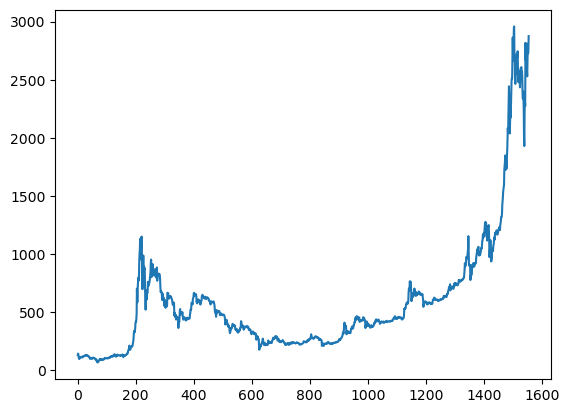

In [38]:
df['Close'].plot()

In [41]:
# On the x-axis we see the numbers associated to the rows as index.

# Set date as index.

df.set_index('Date', inplace=True)

In [42]:
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


<Axes: xlabel='Date'>

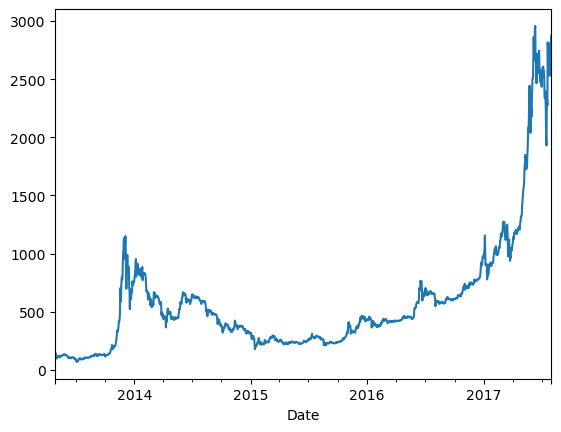

In [43]:
df['Close'].plot()

<Axes: xlabel='Date'>

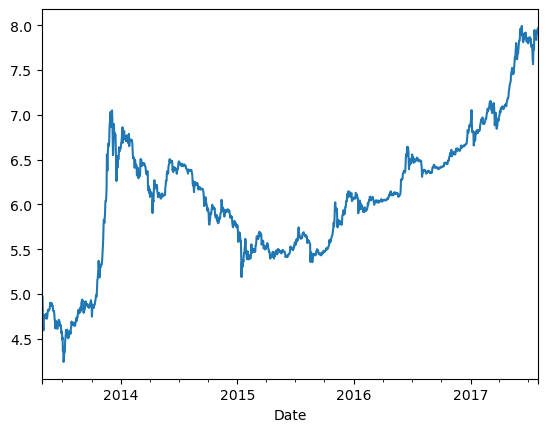

In [46]:
# Apply the logarithmic scale to the plot

np.log1p(df['Close']).plot()


Text(0.5, 1.0, 'Log Scaling')

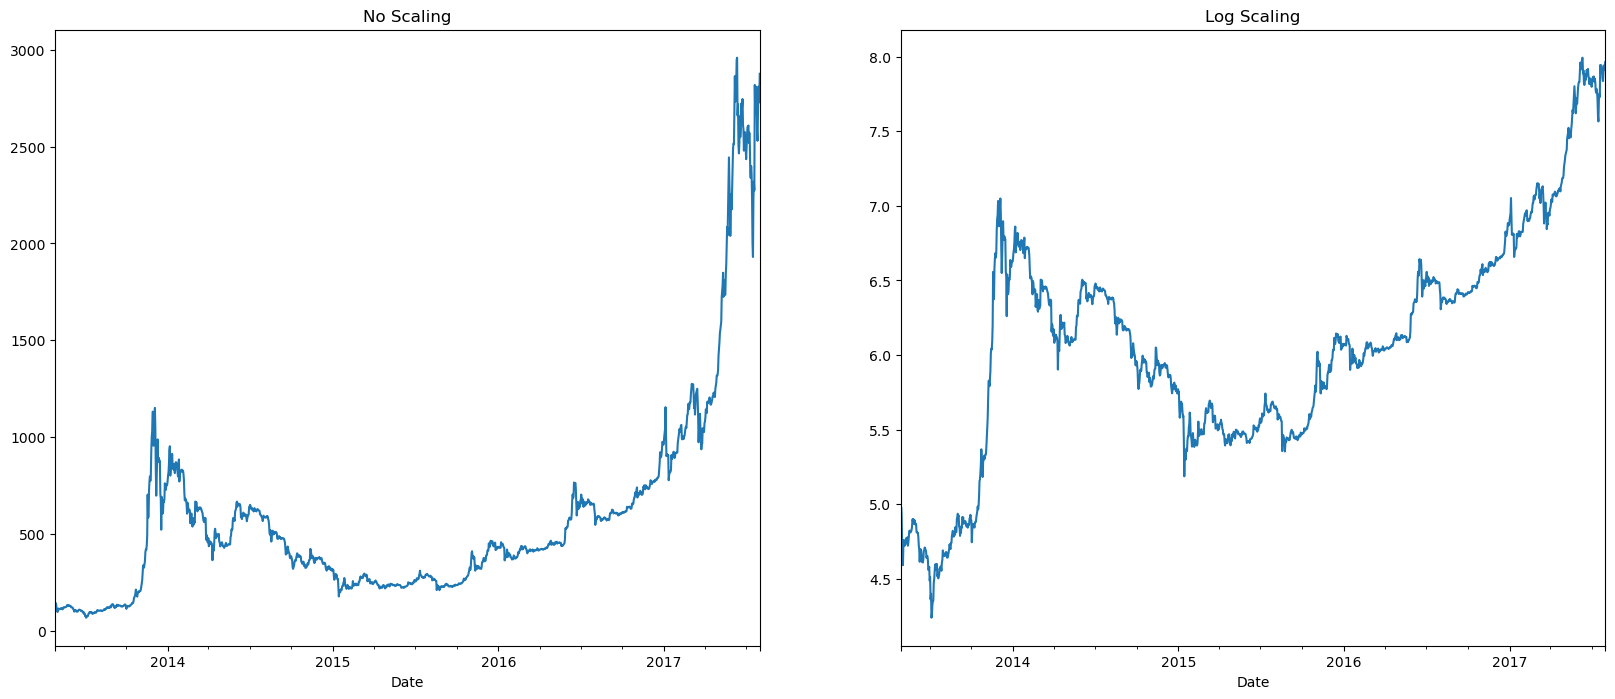

In [53]:
# Display two plots together 

#Define the figure size
plt.figure(figsize=(20,8))

# 1. No scale
plt.subplot(1,2,1)
df['Close'].plot()
plt.title('No Scaling')

#2. Logarithmic scale
plt.subplot(1,2,2)
np.log1p(df['Close']).plot()
plt.title('Log Scaling')

In [54]:
# Conclusion: We observe an upward trend from 2016 to 2017, and a spike in 2014.

# 6. Analysing closing price on yearly, quarterly and monthly bases

In [55]:
df.head(3)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


In [60]:
# Resample closing price on a yearly basis by the annual average.

df['Close'].resample('YE').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: YE-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

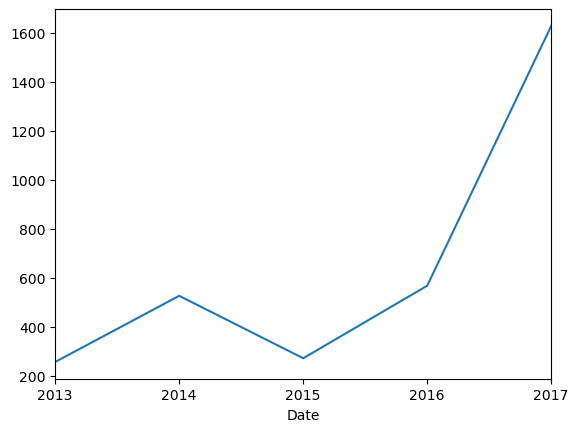

In [59]:
df['Close'].resample('YE').mean().plot()

<Axes: xlabel='Date'>

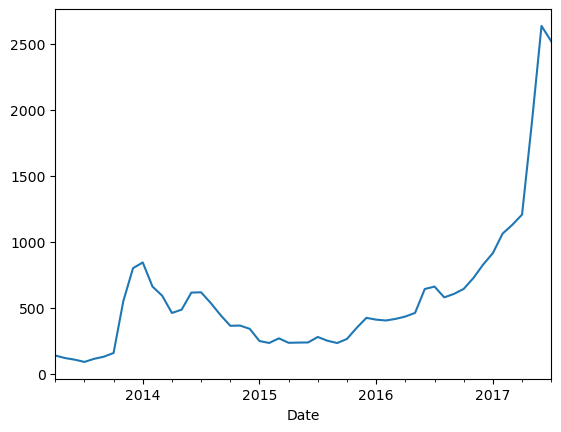

In [63]:
# Monthly basis

df['Close'].resample('ME').mean().plot()

<Axes: xlabel='Date'>

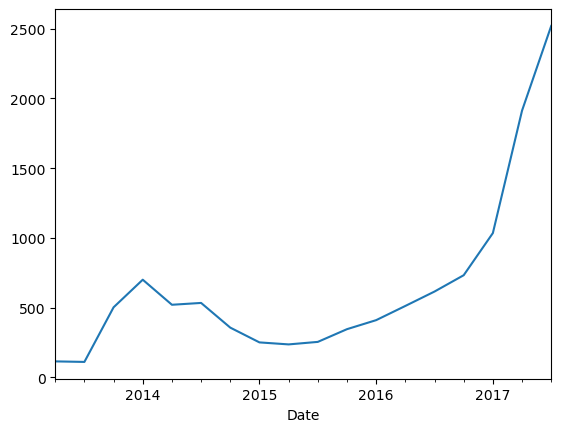

In [64]:
# Quarterly basis

df['Close'].resample('QE').mean().plot()

In [65]:
# Group your data on distinct bases using followings

    # 1. weekly basis ('WE') 
    # 2. Daily_basis('DE')
    # 3. minutes ('3T')
    # 4. 30 second bins('30S')
    # 5. resample('17min') customize

# 7. Analysing the daily change in closing price

In [66]:
df['Close']

Date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Name: Close, Length: 1556, dtype: float64

In [73]:
# We want to examine the daily percentage change in closing price.
# Below, one can find the increase (+) or decrease(-) on a day comparing to 
# the previous day as a percentage value.

df['Close_price_pct_change']=df['Close'].pct_change()*100
df['Close_price_pct_change']

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: Close_price_pct_change, Length: 1556, dtype: float64

<Axes: xlabel='Date'>

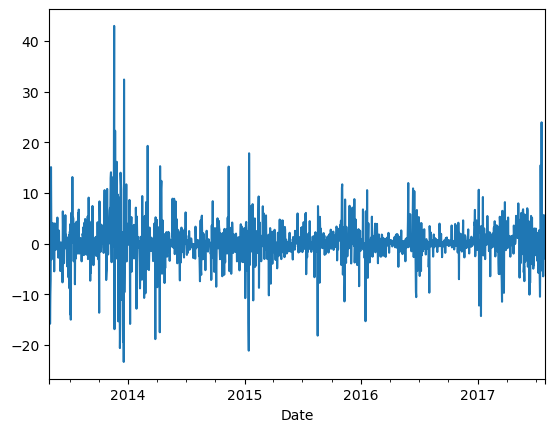

In [74]:
df['Close_price_pct_change'].plot()

In [75]:
import chart_studio.plotly as py # chart_studio provides a web-service for hosting graphs!
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot #interactive plot
init_notebook_mode(connected=True)

In [79]:
import cufflinks as cf

cf.go_offline()

In [80]:
type(df['Close_price_pct_change'])

pandas.core.series.Series

C:\Users\atarb\miniconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



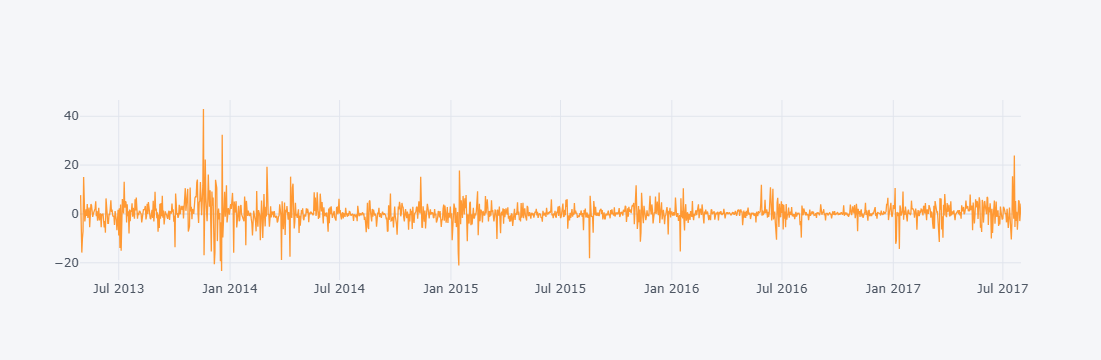

In [90]:
df['Close_price_pct_change'].iplot()

In [ ]:
# Note that big changes in closing prices happened on Nov 18 2013, Dec 19 2013 and Jul 20 2017.
# This data can be used to analyse market performance or sentiment.
# What occasions affected the huge changes can be usefulto make better investment decision.